In [1]:
import numpy as np
import keras
# En caso de emplear TF 2.x, usar:
# from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

2023-03-06 09:20:47.693721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 09:20:47.767377: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-06 09:20:47.769540: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/google/chrome:/opt/google/chrome/lib
2023-03-06 09:20:47.769549: I tensorflow/compiler/xl

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# Tamanño de la representación interna del autoencoder
layer1dim = 64
layer2dim = 32
layer3dim = 64

# capa de entrada
input_img = Input(shape=(784,))
# representación interna (encoded)
h1 = Dense(layer1dim, activation='relu')(input_img)
h2 = Dense(layer2dim, activation='relu')(h1)
h3 = Dense(layer3dim, activation='relu')(h2)

# salida del autoencoder, es decir, la imagen reconstruida (decoded)
decoded = Dense(784, activation='sigmoid')(h3)


# el modelo completo de autoencoder, que apila la entrada y la salida
autoencoder = Model(input_img, decoded)


2023-03-06 09:20:48.899490: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/google/chrome:/opt/google/chrome/lib
2023-03-06 09:20:48.899506: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-06 09:20:48.899518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (XPS-9320): /proc/driver/nvidia/version does not exist
2023-03-06 09:20:48.899657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# este modelo crea la representación interna
encoder = Model(input_img, h3)

encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
Total params: 54,432
Trainable params: 54,432
Non-trainable params: 0
_________________________________________________________________


In [6]:
# capa de entrada de la representación interna
encoded_input = Input(shape=(layer1dim,))

# obtener la última capa del autoencoder definido previamente
decoder_layer = autoencoder.layers[-1]

# creación del modelo
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1.5))
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


/home/ivan/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
n_epochs = 50
n_batch_size = 256

In [9]:
mfit = autoencoder.fit(x_train, x_train,
                epochs=n_epochs,
                batch_size=n_batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3161 - val_loss: 0.2619
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2452 - val_loss: 0.2247
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2068 - val_loss: 0.1921
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1857 - val_loss: 0.1783
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1763 - val_loss: 0.1714
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1689 - val_loss: 0.1647
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1625 - val_loss: 0.1715
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1564 - val_loss: 0.1534
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1505 - val_loss: 0.1469
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1457 - val_loss: 0.1406

In [10]:
#Stacked Autoencoder with functional model
#encoder
inputs = keras.Input(shape=(28,28))
lr_flatten = keras.layers.Flatten()(inputs)
lr1 = keras.layers.Dense(392, activation="selu")(lr_flatten)
lr2 = keras.layers.Dense(196, activation="selu")(lr1)
#decoder
lr3 =  keras.layers.Dense(392, activation="selu")(lr2)
lr4 =  keras.layers.Dense(28 * 28, activation="sigmoid")(lr3)
outputs = keras.layers.Reshape([28, 28])(lr4)
stacked_ae = keras.models.Model(inputs,outputs)
stacked_ae.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1.5))
stacked_ae.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 392)               307720    
                                                                 
 dense_5 (Dense)             (None, 196)               77028     
                                                                 
 dense_6 (Dense)             (None, 392)               77224     
                                                                 
 dense_7 (Dense)             (None, 784)               308112    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0   

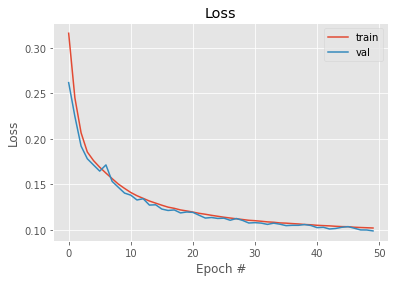

In [11]:
import matplotlib.pyplot as plt

# Plot del training loss
plt.style.use("ggplot")

plt.plot(np.arange(0, n_epochs), mfit.history["loss"], label="train")
plt.plot(np.arange(0, n_epochs), mfit.history["val_loss"], label="val")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [12]:
# codificamos y decodificamos las imágenes de test
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 468us/step


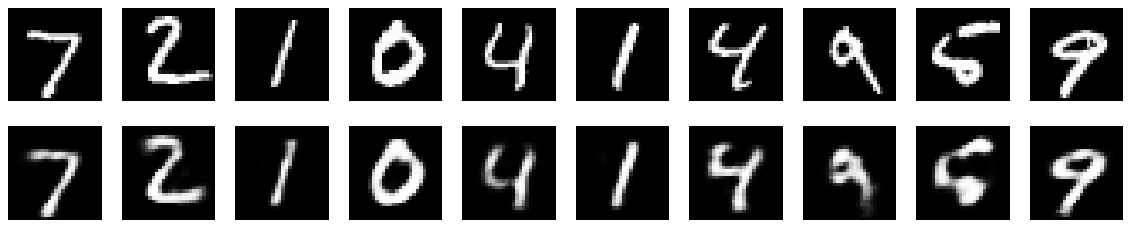

In [13]:
import matplotlib.pyplot as plt

n = 10  # cantidad de ejemplos que mostrar
plt.figure(figsize=(20, 4))

for i in range(n):
    # mostrar la imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar la reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()